<a href="https://colab.research.google.com/github/manogna1105/Rainfall-Prediction/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rainfall Prediction using Machine Learning – Python**

This problem is related to Rainfall Prediction using Machine Learning because machine learning models tend to perform better on the previously known task which needed highly skilled individuals to do so.

**Importing Libraries and Dataset**

**Python** libraries make it easy for us to handle the data and perform typical and complex tasks with a single line of code.

* Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
* Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
* Matplotlib/Seaborn – This library is used to draw visualizations.
* Sklearn – This module contains multiple libraries are having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
* XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.
* Imblearn – This module contains a function that can be used for handling problems related to data imbalance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


As per the above information regarding the data in each column, we can observe that there are no null values.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


**Data Cleaning**

The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or do some modeling on it. Those preprocessing steps are known as data cleaning

In [5]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


So there is one null value in the ‘winddirection’ as well as the ‘windspeed’ column.

In [6]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

Here we can observe that there are unnecessary spaces in the names of the columns let’s remove that.

In [7]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

**Exploratory Data Analysis**

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the data imbalance and skewness of the data.

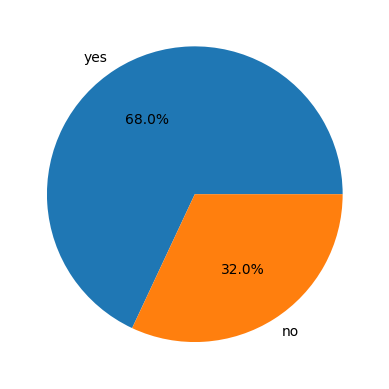

In [8]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [9]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.766129,22.604032


The observations we have drawn from the above dataset are very much similar to what is observed in real life as well.

In [10]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


Let’s check the distribution of the continuous features given in the dataset.

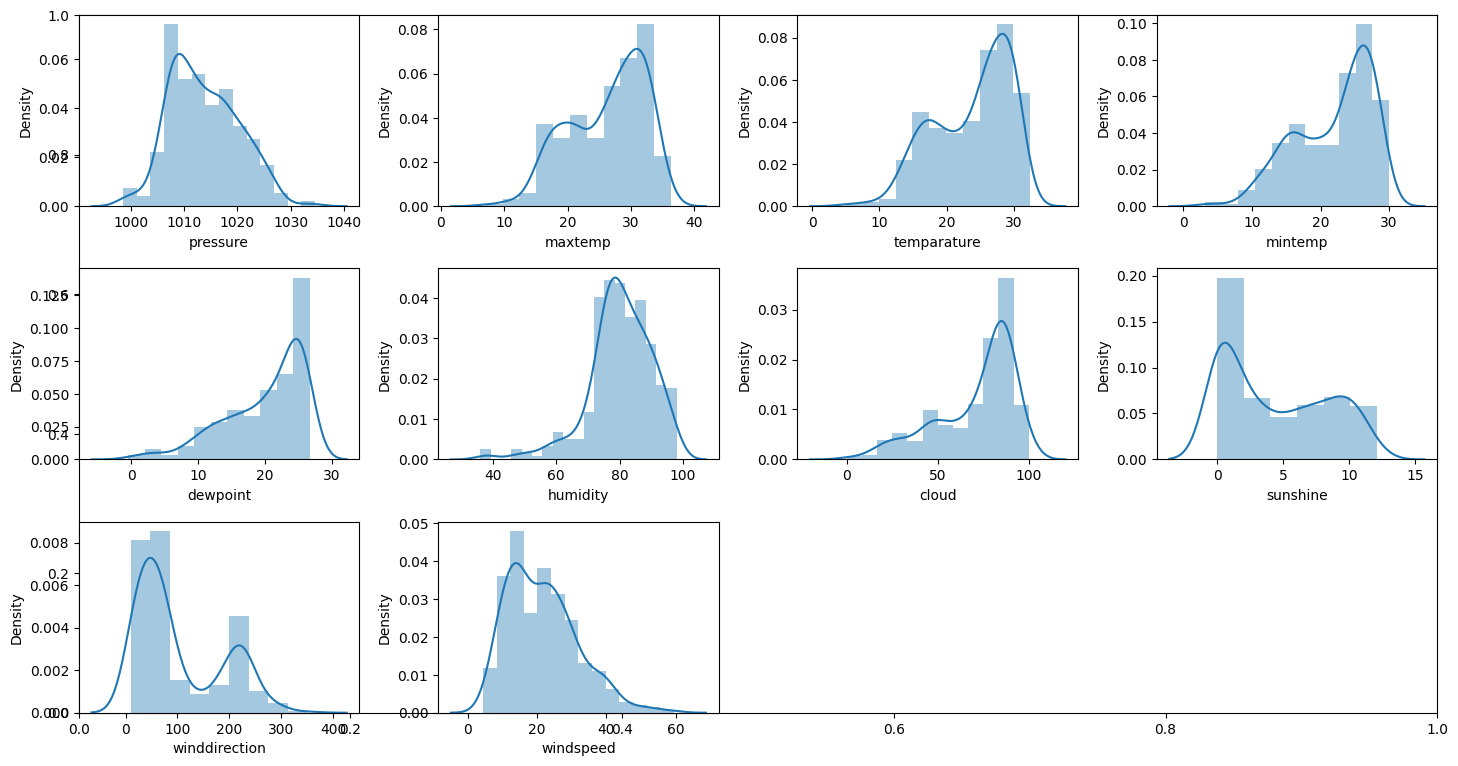

In [11]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

Let’s draw boxplots for the continuous variable to detect the outliers present in the data.

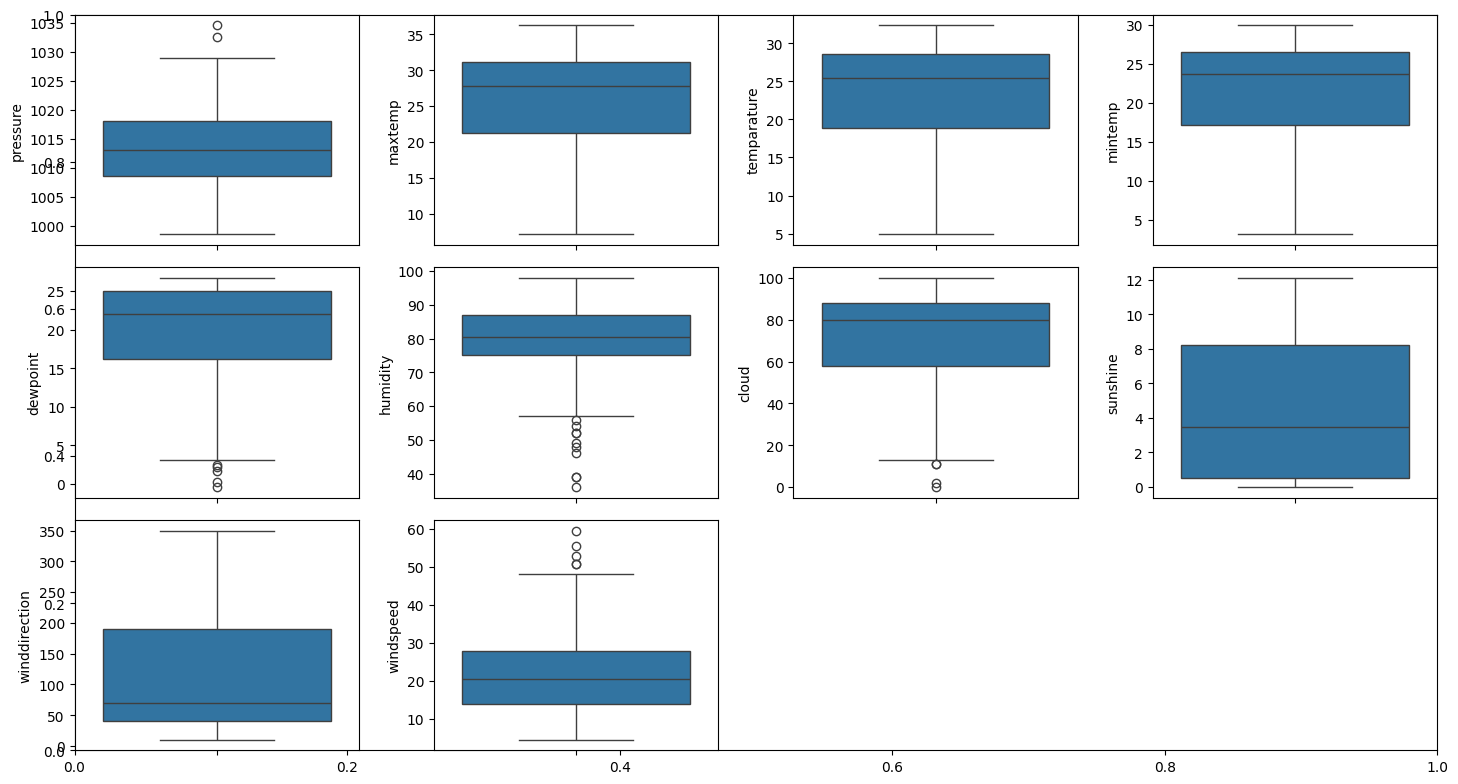

In [12]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

There are outliers in the data but sadly we do not have much data so, we cannot remove this.

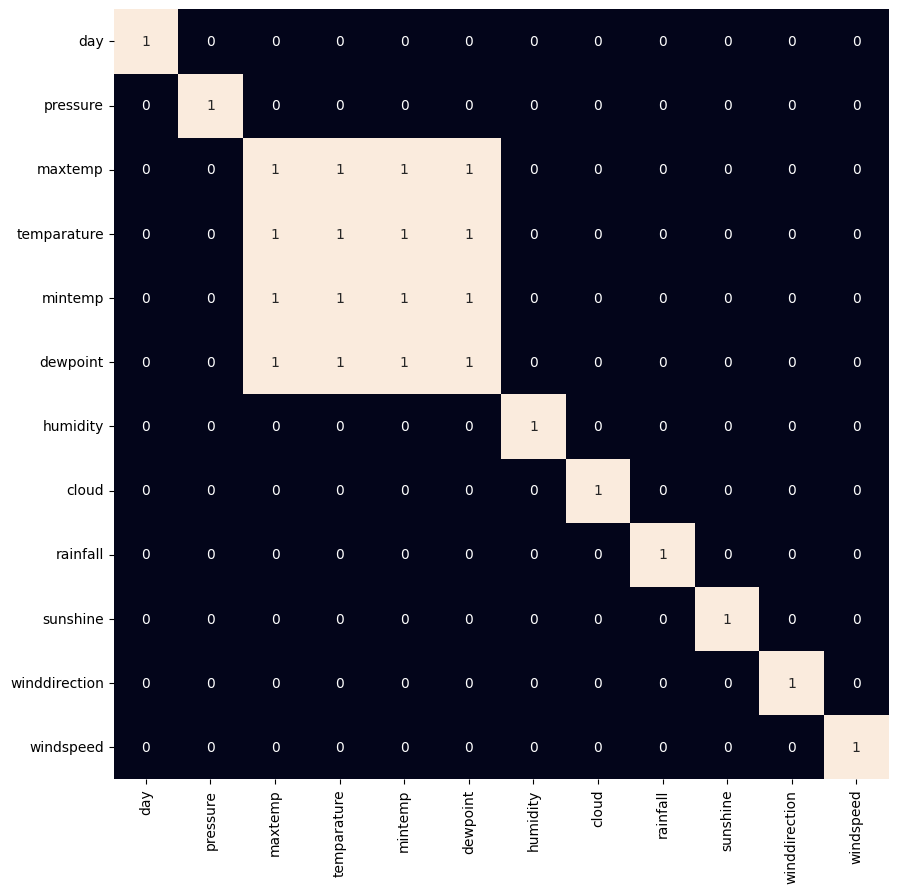

In [14]:
df.replace({'yes':1, 'no':0}, inplace=True)
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

**Model Training**

Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer # Import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Rainfall.csv')
df.head()
# ... (rest of your code) ...

# Before applying StandardScaler
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Impute missing values in X
X_val = imputer.transform(X_val) # Impute missing values in X_val

# Now continue with scaling and model training
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

# ... (rest of your code) ...

Now let’s train some state-of-the-art models for classification and train them on our training data.

* LogisticRegression
* XGBClassifier
* SVC

In [20]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8906340748970986
Validation Accuracy :  0.8975

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8308333333333333

SVC(probability=True) : 
Training Accuracy :  0.9028054847099821
Validation 

**Model Evaluation**

From the above accuracies, we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. Let’s plot the confusion matrix as well for the validation data using the SVC model.

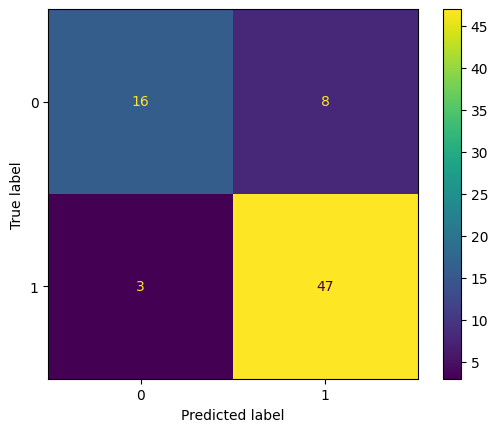

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val)
plt.show()


Let’s plot the classification report as well for the validation data using the SVC model.

In [23]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74

